# PyTorch Custom Datasets

## Downloading custom dataset

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
import requests
import zipfile
from pathlib import Path

The `mkdir()` method has two attributes - `parents` is set to `True` if we want the parent directories to be created if they do ot exist, and `exist_ok` is set to `True` if we do not want the method to raise a `FileExistError` if the file already exists.

In [4]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Creating {image_path} directory")
    image_path.mkdir(parents=True, exist_ok=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading data")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists


## Inspecting downloaded dataset

Our dataset is stored in the standard image classification format.  
Images are stored inn different directories named after the label of the class they belong to.  
We can use the `os` library to examine our data.

In [5]:
import os

In [6]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [8]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [9]:
import random
from PIL import Image

The `glob` method returns all the files in a directory whose path follows the specified format.  
The `parent.stem` attribute is used here to obtain the label of the randomly selected image through the name of its parent directory.

data/pizza_steak_sushi/test/pizza/2236338.jpg : pizza | 512x512


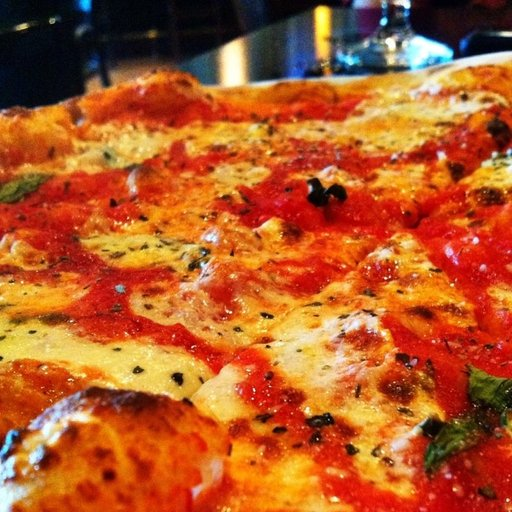

In [10]:
random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"{random_image_path} : {image_class} | {img.width}x{img.height}")
img

## Transforming data

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

## Option-1 - loading data using `ImageFolder`

In [13]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

In [14]:
class_names = train_data.classes
print(class_names)
class_dict = train_data.class_to_idx
print(class_dict)

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


Each element in `train_data` and `test_data` is a tuple of two elements - the first element is a tensor representing the image data and the second element is the output label.

In [15]:
img, label = train_data[0][0], train_data[0][1]
print(img)
print(img.shape)
print(label)

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

To plot an image, it has to be in `(H, W, C)` format rather than `(C, H, W)`.

In [16]:
import matplotlib.pyplot as plt

(-0.5, 63.5, 63.5, -0.5)

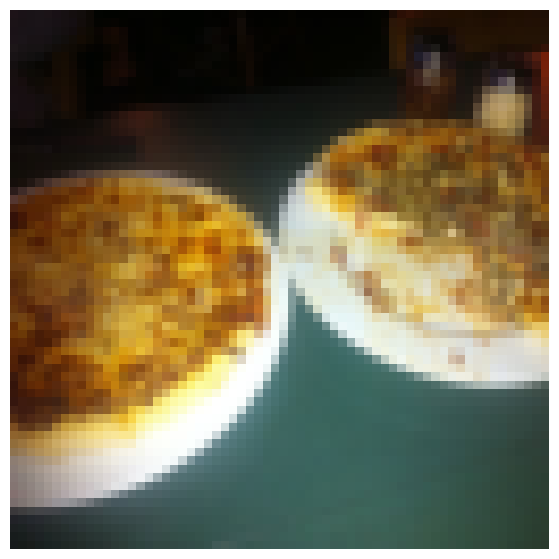

In [17]:
img_permute = img.permute(1, 2, 0)
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")

In [18]:
train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, num_workers=1, shuffle=False)

## Option-2 - loading data using custom `DataLoader`

A custom `Dataset` creator like `ImageFolder` would require using a few external libraries.  
`os` and `pathlib` would be used for dealing with directories and filepaths respectively.  
The `Image` class from `PIL` would be used for loading images.  
The `Dataset` class would be subclassed for our custom dataset.  
Additionaly, we would have to apply `transforms`.  
The `typing` module provides types to add type hints to our code.

In [19]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [20]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [21]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [22]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    def __len__(self) -> int:
        return len(self.paths)
    def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx 

In [23]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [26]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transform)
len(train_data_custom), len(test_data_custom)

(225, 75)

In [27]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, num_workers=0, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=1, num_workers=0, shuffle=False)

## Data augmentation

It is the process of applying random transforms to our dataset to artificially increase the diversity.  
Training models on the transformed dataset is likely to generalise better.  
The `TrivialArgumentWide` transform applies a random number of transforms to the data, with the `num_magnitude_bins` attribute controlling the intensity of transformations.

In [29]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [30]:
train_data_augmented = datasets.ImageFolder(train_dir, train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, test_transform)

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)